Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
2.8.0


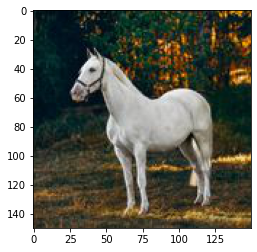

[[0.15873612 0.00352903 0.8377349 ]]
['dogs']


In [2]:
%tensorflow_version 2.x

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')
# sanity check for the tf version
print(tf.__version__)

# loading the google drive

model_path = '/content/gdrive/My Drive/cse-30321-lab2/dogs_cats_birds_model_case01_30epoch'
model=load_model(model_path)
#model.summary()

# added this line to set image width, height, and channel order

img_width, img_height = 150, 150

if K.image_data_format() == 'channels_first':
    input_shape = (1,3, img_width, img_height)
else:
    input_shape = (1,img_width, img_height, 3)

test_image_path = '/content/gdrive/My Drive/cse-30321-lab2/image4.jpeg'


def test_image(filename):
    img = image.load_img(filename, target_size=(img_width,img_height))  # AK: modified to be set by the variables img_weight and img_height
    plt.imshow(img)    # display image
    plt.show()

    img_tensor = image.img_to_array(img)   # creates tensor
    img_tensor = img_tensor.astype('float32') / 255.  # divides each element by 255 so it is between 0 and 1
    img_tensor = img_tensor.reshape(input_shape) # size of input tensor # AK: modified to be set by the variables img_weight, img_height and channel order
    
    # predictions of the model
    pred = model.predict(img_tensor)
    print(pred) 

    # Dictionary of all classes
    labels = {0: 'birds', 1: 'cats', 2: 'dogs'}
    predicted_class_indices=np.argmax(pred,axis=1) # find most likely prediction
    predictions = [labels[k] for k in predicted_class_indices] # find the label of the most likely prediction

    print(predictions)
    

test_image(test_image_path) # added this variable to be set up top